In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
claims = pd.read_csv('dim_claims.csv')
pa = pd.read_csv('dim_pa.csv')
bridge = pd.read_csv('bridge.csv')

In [56]:
pa.head()

,dim_pa_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved
0,1,1,1,0,1
1,2,1,0,0,1
2,3,0,0,1,1
3,4,1,1,0,1
4,5,0,1,0,1


In [57]:
data_claims = claims[claims['bin']==417740]
data_claims.head()

,dim_claim_id,bin,drug,reject_code,pharmacy_claim_approved
2,3,417740,A,76.0,0
4,5,417740,A,NaN,1
5,6,417740,A,NaN,1
7,8,417740,A,NaN,1
32,33,417740,A,76.0,0


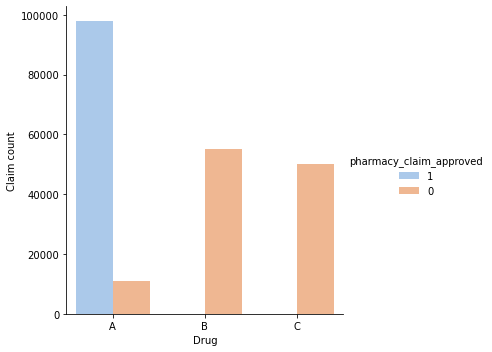

In [58]:
pa_plot=sns.catplot(x="drug", hue="pharmacy_claim_approved", kind="count",hue_order=[1,0],palette="pastel",data=data_claims)
pa_plot.set_axis_labels("Drug","Claim count")

This payer does not directly approve drug B and C. Some cases of Drug A also need PA, could be due to limit crossing. Let's look at the rejection codes for each drug.

In [64]:
data_claims_417740 = pd.merge(bridge,data_claims,on='dim_claim_id')
data = pd.merge(data_claims_417740,pa,on='dim_pa_id')
conditions = [(data['correct_diagnosis']==1)&(data['tried_and_failed']==0)&(data['contraindication']==0),
             (data['correct_diagnosis']==0)&(data['tried_and_failed']==1)&(data['contraindication']==0),
             (data['correct_diagnosis']==0)&(data['tried_and_failed']==0)&(data['contraindication']==1),
             (data['correct_diagnosis']==1)&(data['tried_and_failed']==1)&(data['contraindication']==0),
             (data['correct_diagnosis']==1)&(data['tried_and_failed']==0)&(data['contraindication']==1),
             (data['correct_diagnosis']==0)&(data['tried_and_failed']==1)&(data['contraindication']==1),
             (data['correct_diagnosis']==1)&(data['tried_and_failed']==1)&(data['contraindication']==1),
             (data['correct_diagnosis']==0)&(data['tried_and_failed']==0)&(data['contraindication']==0)]
values = ['CD','TF','CI','CDTF','CDCI','TFCI','CDTFCI','None']
data['claim_reason'] = np.select(conditions,values)
data.head()

,dim_claim_id,dim_pa_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved,correct_diagnosis,tried_and_failed,contraindication,pa_approved,claim_reason
0,3,2.0,1,417740,A,76.0,0,1,0,0,1,CD
1,33,16.0,1,417740,A,76.0,0,1,1,1,0,CDTFCI
2,59,25.0,1,417740,A,76.0,0,1,0,0,1,CD
3,110,49.0,1,417740,B,70.0,0,1,0,0,0,CD
4,119,50.0,1,417740,B,70.0,0,1,0,0,0,CD


In [65]:
data_A = data[data['drug']=='A']
data_A['reject_code'].value_counts()

76.0    10817
Name: reject_code, dtype: int64

In [66]:
data_B = data[data['drug']=='B']
data_B['reject_code'].value_counts()

70.0    55035
Name: reject_code, dtype: int64

In [67]:
data_C = data[data['drug']=='C']
data_C['reject_code'].value_counts()

75.0    50179
Name: reject_code, dtype: int64

Drug A rejections are due to limit crossing, drug B rejections are due to drug not being on formulary, drug C rejections are due to a compulsary PA requirement.

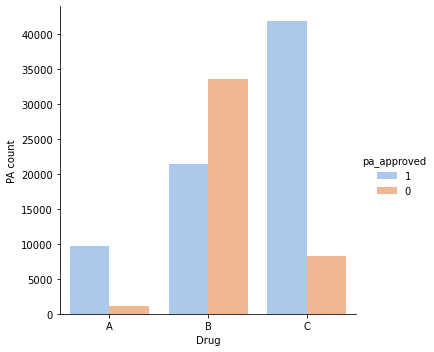

In [63]:
##Looking at PA approvals 
pa_plot=sns.catplot(x="drug", hue="pa_approved", kind="count",hue_order=[1,0],palette="pastel",data=data)
pa_plot.set_axis_labels("Drug","PA count")

In [68]:
data_A['pa_approved'].mean()

0.9011740778404363

In [69]:
data_B['pa_approved'].mean()

0.38997001907876805

In [70]:
data_C['pa_approved'].mean()

0.8341138723370334

Looking at pPA features for each drug to see how presence/absence of features affects the approval probability. 

In [71]:
data_A_CD = data_A[data_A['correct_diagnosis']==1]
data_A_TF = data_A[data_A['tried_and_failed']==1]
data_A_CI = data_A[data_A['contraindication']==1]
data_A_None = data_A[(data_A['correct_diagnosis']==0)&(data_A['tried_and_failed']==0)&(data_A['contraindication']==0)]
print("Approval rate for drug A with correct diagnosis is",data_A_CD['pa_approved'].mean())
print("Approval rate for drug A with tried and failed is",data_A_TF['pa_approved'].mean())
print("Approval rate for drug A with contraindication is",data_A_CI['pa_approved'].mean())
print("Approval rate for drug A with no features is",data_A_None['pa_approved'].mean())

Approval rate for drug A with correct diagnosis is 0.907601799515515
Approval rate for drug A with tried and failed is 0.9386194029850746
Approval rate for drug A with contraindication is 0.7262340036563071
Approval rate for drug A with no features is 0.8960739030023095


In [72]:
data_A_CDTF = data_A[(data_A['correct_diagnosis']==1)&(data_A['tried_and_failed']==1)&(data_A['contraindication']==0)]
data_A_CDonly = data_A[(data_A['correct_diagnosis']==1)&(data_A['tried_and_failed']==0)&(data_A['contraindication']==0)]
data_A_TFonly = data_A[(data_A['correct_diagnosis']==0)&(data_A['tried_and_failed']==1)&(data_A['contraindication']==0)]
data_A_CIonly = data_A[(data_A['correct_diagnosis']==0)&(data_A['tried_and_failed']==0)&(data_A['contraindication']==1)]
data_A_CDTFCI = data_A[(data_A['correct_diagnosis']==1)&(data_A['tried_and_failed']==1)&(data_A['contraindication']==1)]
data_A_TFCI = data_A[(data_A['correct_diagnosis']==0)&(data_A['tried_and_failed']==1)&(data_A['contraindication']==1)]
data_A_CDCI = data_A[(data_A['correct_diagnosis']==1)&(data_A['tried_and_failed']==0)&(data_A['contraindication']==1)]
print("Approval rate for drug A with correct diagnosis only is",data_A_CDonly['pa_approved'].mean())
print("Approval rate for drug A with tried & failed only is",data_A_TFonly['pa_approved'].mean())
print("Approval rate for drug A with correct diagnosis and tried & failed is",data_A_CDTF['pa_approved'].mean())
print("Approval rate for drug A with contraindication only is",data_A_CIonly['pa_approved'].mean())
print("Approval rate for drug A with correct diagnosis, tried & failed and contraindication is",data_A_CDTFCI['pa_approved'].mean())
print("Approval rate for drug A with tried & failed and contraindication is",data_A_TFCI['pa_approved'].mean())
print("Approval rate for drug A with correct diagnosis and contraindication is",data_A_CDCI['pa_approved'].mean())

Approval rate for drug A with correct diagnosis only is 0.9280596159357982
Approval rate for drug A with tried & failed only is 0.9598108747044918
Approval rate for drug A with correct diagnosis and tried & failed is 0.9722870478413069
Approval rate for drug A with contraindication only is 0.5534883720930233
Approval rate for drug A with correct diagnosis, tried & failed and contraindication is 0.8242774566473988
Approval rate for drug A with tried & failed and contraindication is 0.7828054298642534
Approval rate for drug A with correct diagnosis and contraindication is 0.6583990980834273


In [73]:
data_B_CD = data_B[data_B['correct_diagnosis']==1]
data_B_TF = data_B[data_B['tried_and_failed']==1]
data_B_CI = data_B[data_B['contraindication']==1]
data_B_None = data_B[(data_B['correct_diagnosis']==0)&(data_B['tried_and_failed']==0)&(data_B['contraindication']==0)]
print("Approval rate for drug B with correct diagnosis is",data_B_CD['pa_approved'].mean())
print("Approval rate for drug B with tried and failed is",data_B_TF['pa_approved'].mean())
print("Approval rate for drug B with contraindication is",data_B_CI['pa_approved'].mean())
print("Approval rate for drug B with no features is",data_B_None['pa_approved'].mean())

Approval rate for drug B with correct diagnosis is 0.4033531245023772
Approval rate for drug B with tried and failed is 0.4825931671416718
Approval rate for drug B with contraindication is 0.12536284470246734
Approval rate for drug B with no features is 0.289875173370319


In [74]:
data_B_CDonly = data_B[(data_B['correct_diagnosis']==1)&(data_B['tried_and_failed']==0)&(data_B['contraindication']==0)]
data_B_TFonly = data_B[(data_B['correct_diagnosis']==0)&(data_B['tried_and_failed']==1)&(data_B['contraindication']==0)]
data_B_CIonly = data_B[(data_B['correct_diagnosis']==0)&(data_B['tried_and_failed']==0)&(data_B['contraindication']==1)]
data_B_CDTF = data_B[(data_B['correct_diagnosis']==1)&(data_B['tried_and_failed']==1)&(data_B['contraindication']==0)]
data_B_TFCI = data_B[(data_B['correct_diagnosis']==0)&(data_B['tried_and_failed']==1)&(data_B['contraindication']==1)]
data_B_CDCI = data_B[(data_B['correct_diagnosis']==1)&(data_B['tried_and_failed']==0)&(data_B['contraindication']==1)]
data_B_CDTFCI = data_B[(data_B['correct_diagnosis']==1)&(data_B['tried_and_failed']==1)&(data_B['contraindication']==1)]
print("Approval rate for drug B with correct diagnosis only is",data_B_CDonly['pa_approved'].mean())
print("Approval rate for drug B with tried & failed only is",data_B_TFonly['pa_approved'].mean())
print("Approval rate for drug B with contraindication only is",data_B_CIonly['pa_approved'].mean())
print("Approval rate for drug B with correct diagnosis and tried & failed is",data_B_CDTF['pa_approved'].mean())
print("Approval rate for drug B with tried & failed and contraindication is",data_B_TFCI['pa_approved'].mean())
print("Approval rate for drug B with correct diagnosis and contraindication is",data_B_CDCI['pa_approved'].mean())
print("Approval rate for drug B with correct diagnosis, tried & failed and contraindication is",data_B_CDTFCI['pa_approved'].mean())


Approval rate for drug B with correct diagnosis only is 0.3691202463082274
Approval rate for drug B with tried & failed only is 0.5020957423339951
Approval rate for drug B with contraindication only is 0.04440497335701599
Approval rate for drug B with correct diagnosis and tried & failed is 0.5720774427979334
Approval rate for drug B with tried & failed and contraindication is 0.1384051329055912
Approval rate for drug B with correct diagnosis and contraindication is 0.07098265895953758
Approval rate for drug B with correct diagnosis, tried & failed and contraindication is 0.19500223114680945


In [75]:
data_C_CD = data_C[data_C['correct_diagnosis']==1]
data_C_TF = data_C[data_C['tried_and_failed']==1]
data_C_CI = data_C[data_C['contraindication']==1]
data_C_None = data_C[(data_C['correct_diagnosis']==0)&(data_C['tried_and_failed']==0)&(data_C['contraindication']==0)]
print("Approval rate for drug C with correct diagnosis is",data_C_CD['pa_approved'].mean())
print("Approval rate for drug C with tried and failed is",data_C_TF['pa_approved'].mean())
print("Approval rate for drug C with contraindication is",data_C_CI['pa_approved'].mean())
print("Approval rate for drug C with no features is",data_C_None['pa_approved'].mean())

Approval rate for drug C with correct diagnosis is 0.8407950310559006
Approval rate for drug C with tried and failed is 0.8912167285206911
Approval rate for drug C with contraindication is 0.5898687824229478
Approval rate for drug C with no features is 0.8167420814479638


In [76]:
data_C_CDonly = data_C[(data_C['correct_diagnosis']==1)&(data_C['tried_and_failed']==0)&(data_C['contraindication']==0)]
data_C_TFonly = data_C[(data_C['correct_diagnosis']==0)&(data_C['tried_and_failed']==1)&(data_C['contraindication']==0)]
data_C_CIonly = data_C[(data_C['correct_diagnosis']==0)&(data_C['tried_and_failed']==0)&(data_C['contraindication']==1)]
data_C_CDTF = data_C[(data_C['correct_diagnosis']==1)&(data_C['tried_and_failed']==1)&(data_C['contraindication']==0)]
data_C_TFCI = data_C[(data_C['correct_diagnosis']==0)&(data_C['tried_and_failed']==1)&(data_C['contraindication']==1)]
data_C_CDCI = data_C[(data_C['correct_diagnosis']==1)&(data_C['tried_and_failed']==0)&(data_C['contraindication']==1)]
data_C_CDTFCI = data_C[(data_C['correct_diagnosis']==1)&(data_C['tried_and_failed']==1)&(data_C['contraindication']==1)]
print("Approval rate for drug C with correct diagnosis only is",data_C_CDonly['pa_approved'].mean())
print("Approval rate for drug C with tried & failed only is",data_C_TFonly['pa_approved'].mean())
print("Approval rate for drug C with contraindication only is",data_C_CIonly['pa_approved'].mean())
print("Approval rate for drug C with correct diagnosis and tried & failed is",data_C_CDTF['pa_approved'].mean())
print("Approval rate for drug C with tried & failed and contraindication is",data_C_TFCI['pa_approved'].mean())
print("Approval rate for drug C with correct diagnosis and contraindication is",data_C_CDCI['pa_approved'].mean())
print("Approval rate for drug C with correct diagnosis, tried & failed and contraindication is",data_C_CDTFCI['pa_approved'].mean())

Approval rate for drug C with correct diagnosis only is 0.8541333004804731
Approval rate for drug C with tried & failed only is 0.923513446829509
Approval rate for drug C with contraindication only is 0.4275132275132275
Approval rate for drug C with correct diagnosis and tried & failed is 0.9449729528073121
Approval rate for drug C with tried & failed and contraindication is 0.6474291710388248
Approval rate for drug C with correct diagnosis and contraindication is 0.5054251829422155
Approval rate for drug C with correct diagnosis, tried & failed and contraindication is 0.698992443324937


Looking at distribution of PA features for all approved PAs for each drug.

In [78]:
data_A_approved = data[(data['drug']=='A')&(data['pa_approved']==1)]
data_B_approved = data[(data['drug']=='B')&(data['pa_approved']==1)]
data_C_approved = data[(data['drug']=='C')&(data['pa_approved']==1)]

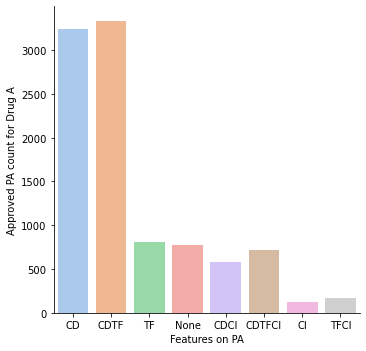

In [79]:
##Looking at distribution of claim features within approved PAs for Drug A
pa_plot_A=sns.catplot(x="claim_reason", kind="count",palette="pastel",data=data_A_approved)
pa_plot_A.set_axis_labels("Features on PA","Approved PA count for Drug A")

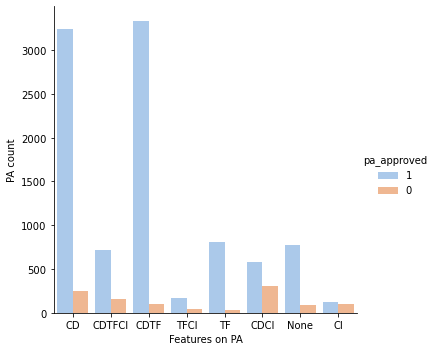

In [80]:
pa_plot_A_all = sns.catplot(x="claim_reason", hue="pa_approved", kind="count",hue_order=[1,0],palette="pastel",data=data_A)
pa_plot_A_all.set_axis_labels("Features on PA","PA count")

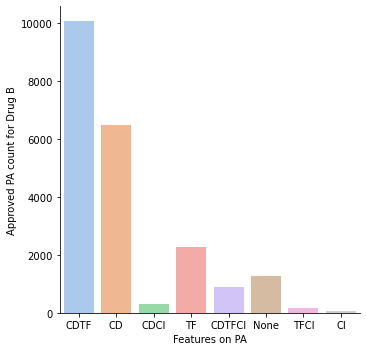

In [81]:
##Looking at distribution of claim features within approved PAs for Drug B
pa_plot_B=sns.catplot(x="claim_reason", kind="count",palette="pastel",data=data_B_approved)
pa_plot_B.set_axis_labels("Features on PA","Approved PA count for Drug B")

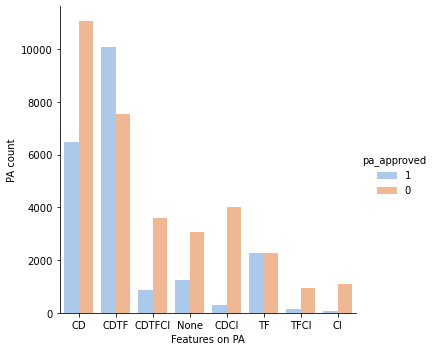

In [82]:
pa_plot_B_all = sns.catplot(x="claim_reason", hue="pa_approved", kind="count",hue_order=[1,0],palette="pastel",data=data_B)
pa_plot_B_all.set_axis_labels("Features on PA","PA count")

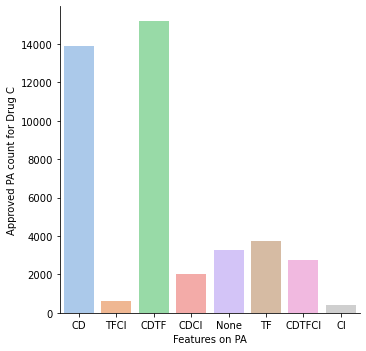

In [83]:
##Looking at distribution of claim features within approved PAs for Drug C
pa_plot_C=sns.catplot(x="claim_reason", kind="count",palette="pastel",data=data_C_approved)
pa_plot_C.set_axis_labels("Features on PA","Approved PA count for Drug C")

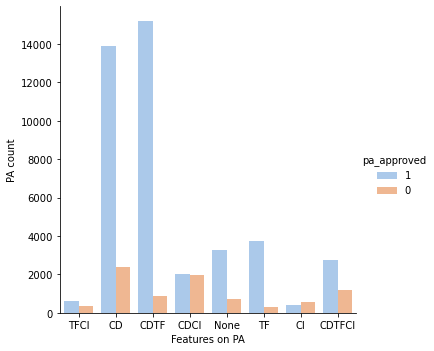

In [84]:
pa_plot_C_all = sns.catplot(x="claim_reason", hue="pa_approved", kind="count",hue_order=[1,0],palette="pastel",data=data_C)
pa_plot_C_all.set_axis_labels("Features on PA","PA count")